In [1]:
!pip install -qqq git+https://github.com/albumentations-team/albumentations.git
!pip install -qqq torchsummary

In [2]:
!git clone https://github.com/hassiahk/train-your-model-pytorch.git

Cloning into 'train-your-model-pytorch'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 45 (delta 14), reused 40 (delta 12), pack-reused 0
Unpacking objects: 100% (45/45), done.


In [3]:
cd train-your-model-pytorch/

/content/train-your-model-pytorch


### Seed for reproducibility

In [4]:
from utils.helper import seed_everything, get_default_device, calculate_mean_std
seed_everything(42)

### Mean and std of CIFAR10

In [5]:
mean, std = calculate_mean_std("CIFAR10")
mean, std


Extracting ./data/cifar-10-python.tar.gz to ./data


(array([0.49139968, 0.48215841, 0.44653091]),
 array([0.24703223, 0.24348513, 0.26158784]))

### Transformations

In [6]:
from utils.transforms import apply_transforms
train_transforms, test_transforms = apply_transforms(mean, std)

### Train and Test dataset

In [7]:
from torchvision import datasets

train_dataset = datasets.CIFAR10(root='data/', train=True, download=False, transform=train_transforms)
test_dataset = datasets.CIFAR10(root='data/', train=False, download=False, transform=test_transforms)

### Labels

In [8]:
labels = train_dataset.classes
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

### Train and Test Loader

In [9]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True, pin_memory=True, num_workers=2)
test_loader = DataLoader(dataset=test_dataset, batch_size=128, shuffle=False, pin_memory=True, num_workers=2)

### Show a batch of images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

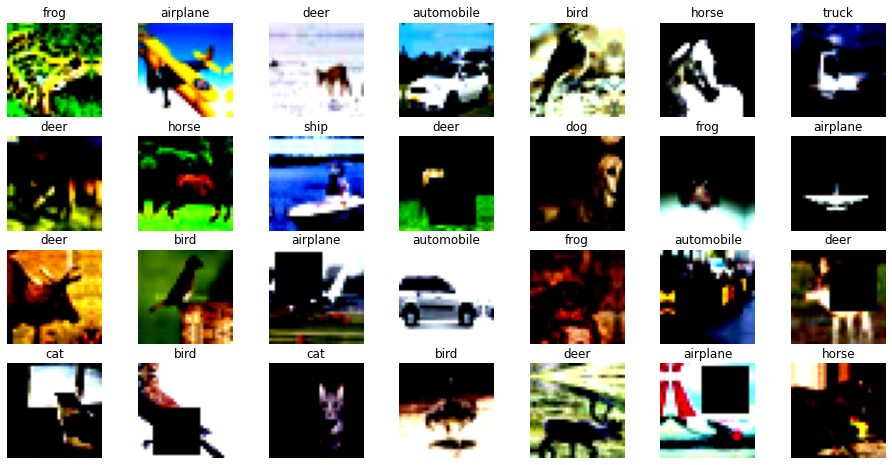

In [10]:
from utils.plot_utils import show_batch

show_batch(train_loader, labels)

### Get the device

In [11]:
device = get_default_device()
device

device(type='cuda')

### Model Summary

In [12]:
from models.resnet import resnet18
from utils.helper import model_summary

model = resnet18("LN").to(device)

model_summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
         GroupNorm-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
         GroupNorm-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
         GroupNorm-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
         GroupNorm-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
        GroupNorm-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
        GroupNorm-14          [-1, 128,

### Training and Testing

In [13]:
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim

epochs = 40
lr = 0.001
l1_factor = 0

optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

In [14]:
from main import trainer

train_accuracy, train_losses, test_accuracy, test_losses = trainer(model, epochs, device, train_loader, test_loader, optimizer, criterion, l1_factor, use_scheduler=True)

  0%|          | 0/391 [00:00<?, ?it/s]

Epoch 1:


Train Loss=1.8026634454727173 Batch_id=390 LR= 0.00100 Train Accuracy= 23.35: 100%|██████████| 391/391 [01:24<00:00,  4.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0135, Test Accuracy: 3868/10000 (38.68%)

Epoch 2:


Train Loss=1.419179081916809 Batch_id=390 LR= 0.00100 Train Accuracy= 39.83: 100%|██████████| 391/391 [01:25<00:00,  4.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0112, Test Accuracy: 4829/10000 (48.29%)

Epoch 3:


Train Loss=1.3668787479400635 Batch_id=390 LR= 0.00100 Train Accuracy= 47.62: 100%|██████████| 391/391 [01:25<00:00,  4.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0104, Test Accuracy: 5243/10000 (52.43%)

Epoch 4:


Train Loss=1.1890308856964111 Batch_id=390 LR= 0.00100 Train Accuracy= 54.58: 100%|██████████| 391/391 [01:25<00:00,  4.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0087, Test Accuracy: 6012/10000 (60.12%)

Epoch 5:


Train Loss=1.0986378192901611 Batch_id=390 LR= 0.00100 Train Accuracy= 59.77: 100%|██████████| 391/391 [01:25<00:00,  4.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0081, Test Accuracy: 6304/10000 (63.04%)

Epoch 6:


Train Loss=1.0017337799072266 Batch_id=390 LR= 0.00100 Train Accuracy= 63.25: 100%|██████████| 391/391 [01:25<00:00,  4.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0073, Test Accuracy: 6741/10000 (67.41%)

Epoch 7:


Train Loss=0.958392322063446 Batch_id=390 LR= 0.00100 Train Accuracy= 67.01: 100%|██████████| 391/391 [01:25<00:00,  4.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0069, Test Accuracy: 6956/10000 (69.56%)

Epoch 8:


Train Loss=0.9467018842697144 Batch_id=390 LR= 0.00100 Train Accuracy= 69.01: 100%|██████████| 391/391 [01:25<00:00,  4.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0064, Test Accuracy: 7160/10000 (71.60%)

Epoch 9:


Train Loss=0.7926055192947388 Batch_id=390 LR= 0.00100 Train Accuracy= 71.68: 100%|██████████| 391/391 [01:25<00:00,  4.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0058, Test Accuracy: 7433/10000 (74.33%)

Epoch 10:


Train Loss=0.8045053482055664 Batch_id=390 LR= 0.00100 Train Accuracy= 73.39: 100%|██████████| 391/391 [01:25<00:00,  4.58it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0055, Test Accuracy: 7584/10000 (75.84%)

Epoch 11:


Train Loss=0.5746155977249146 Batch_id=390 LR= 0.00100 Train Accuracy= 74.86: 100%|██████████| 391/391 [01:25<00:00,  4.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0050, Test Accuracy: 7804/10000 (78.04%)

Epoch 12:


Train Loss=0.5101235508918762 Batch_id=390 LR= 0.00100 Train Accuracy= 77.00: 100%|██████████| 391/391 [01:25<00:00,  4.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0050, Test Accuracy: 7808/10000 (78.08%)

Epoch 13:


Train Loss=0.6641258001327515 Batch_id=390 LR= 0.00100 Train Accuracy= 78.47: 100%|██████████| 391/391 [01:25<00:00,  4.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0045, Test Accuracy: 8031/10000 (80.31%)

Epoch 14:


Train Loss=0.8516451120376587 Batch_id=390 LR= 0.00100 Train Accuracy= 79.93: 100%|██████████| 391/391 [01:24<00:00,  4.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0043, Test Accuracy: 8094/10000 (80.94%)

Epoch 15:


Train Loss=0.3986019194126129 Batch_id=390 LR= 0.00100 Train Accuracy= 81.65: 100%|██████████| 391/391 [01:24<00:00,  4.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0040, Test Accuracy: 8234/10000 (82.34%)

Epoch 16:


Train Loss=0.33347034454345703 Batch_id=390 LR= 0.00100 Train Accuracy= 82.79: 100%|██████████| 391/391 [01:24<00:00,  4.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0038, Test Accuracy: 8331/10000 (83.31%)

Epoch 17:


Train Loss=0.41548699140548706 Batch_id=390 LR= 0.00100 Train Accuracy= 84.14: 100%|██████████| 391/391 [01:24<00:00,  4.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0035, Test Accuracy: 8490/10000 (84.90%)

Epoch 18:


Train Loss=0.473477303981781 Batch_id=390 LR= 0.00100 Train Accuracy= 85.09: 100%|██████████| 391/391 [01:24<00:00,  4.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0036, Test Accuracy: 8480/10000 (84.80%)

Epoch 19:


Train Loss=0.5099872350692749 Batch_id=390 LR= 0.00100 Train Accuracy= 86.24: 100%|██████████| 391/391 [01:24<00:00,  4.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0038, Test Accuracy: 8390/10000 (83.90%)

Epoch 20:


Train Loss=0.39945095777511597 Batch_id=390 LR= 0.00100 Train Accuracy= 87.07: 100%|██████████| 391/391 [01:24<00:00,  4.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0035, Test Accuracy: 8556/10000 (85.56%)

Epoch 21:


Train Loss=0.34328970313072205 Batch_id=390 LR= 0.00100 Train Accuracy= 88.06: 100%|██████████| 391/391 [01:24<00:00,  4.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0035, Test Accuracy: 8551/10000 (85.51%)

Epoch 22:


Train Loss=0.5458710193634033 Batch_id=390 LR= 0.00100 Train Accuracy= 88.87: 100%|██████████| 391/391 [01:24<00:00,  4.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0036, Test Accuracy: 8522/10000 (85.22%)

Epoch 23:


Train Loss=0.311465322971344 Batch_id=390 LR= 0.00100 Train Accuracy= 89.66: 100%|██████████| 391/391 [01:24<00:00,  4.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0034, Test Accuracy: 8651/10000 (86.51%)

Epoch 24:


Train Loss=0.3261822462081909 Batch_id=390 LR= 0.00100 Train Accuracy= 89.88: 100%|██████████| 391/391 [01:24<00:00,  4.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0032, Test Accuracy: 8745/10000 (87.45%)

Epoch 25:


Train Loss=0.3183717131614685 Batch_id=390 LR= 0.00100 Train Accuracy= 91.06: 100%|██████████| 391/391 [01:24<00:00,  4.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0033, Test Accuracy: 8686/10000 (86.86%)

Epoch 26:


Train Loss=0.23380902409553528 Batch_id=390 LR= 0.00100 Train Accuracy= 91.38: 100%|██████████| 391/391 [01:24<00:00,  4.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0034, Test Accuracy: 8678/10000 (86.78%)

Epoch 27:


Train Loss=0.23028528690338135 Batch_id=390 LR= 0.00100 Train Accuracy= 91.89: 100%|██████████| 391/391 [01:24<00:00,  4.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0036, Test Accuracy: 8669/10000 (86.69%)

Epoch 28:


Train Loss=0.26705169677734375 Batch_id=390 LR= 0.00100 Train Accuracy= 92.45: 100%|██████████| 391/391 [01:24<00:00,  4.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0034, Test Accuracy: 8722/10000 (87.22%)

Epoch    28: reducing learning rate of group 0 to 2.0000e-04.
Epoch 29:


Train Loss=0.14128755033016205 Batch_id=390 LR= 0.00020 Train Accuracy= 95.78: 100%|██████████| 391/391 [01:24<00:00,  4.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0031, Test Accuracy: 8901/10000 (89.01%)

Epoch 30:


Train Loss=0.09697981178760529 Batch_id=390 LR= 0.00020 Train Accuracy= 96.14: 100%|██████████| 391/391 [01:24<00:00,  4.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0032, Test Accuracy: 8941/10000 (89.41%)

Epoch 31:


Train Loss=0.07749295979738235 Batch_id=390 LR= 0.00020 Train Accuracy= 96.25: 100%|██████████| 391/391 [01:24<00:00,  4.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0032, Test Accuracy: 8942/10000 (89.42%)

Epoch 32:


Train Loss=0.15043646097183228 Batch_id=390 LR= 0.00020 Train Accuracy= 96.55: 100%|██████████| 391/391 [01:24<00:00,  4.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0034, Test Accuracy: 8898/10000 (88.98%)

Epoch 33:


Train Loss=0.09210254997015 Batch_id=390 LR= 0.00020 Train Accuracy= 96.59: 100%|██████████| 391/391 [01:24<00:00,  4.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0034, Test Accuracy: 8958/10000 (89.58%)

Epoch 34:


Train Loss=0.06742336601018906 Batch_id=390 LR= 0.00020 Train Accuracy= 96.73: 100%|██████████| 391/391 [01:24<00:00,  4.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0034, Test Accuracy: 8908/10000 (89.08%)

Epoch 35:


Train Loss=0.05402161553502083 Batch_id=390 LR= 0.00020 Train Accuracy= 96.97: 100%|██████████| 391/391 [01:24<00:00,  4.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0036, Test Accuracy: 8868/10000 (88.68%)

Epoch 36:


Train Loss=0.13997545838356018 Batch_id=390 LR= 0.00020 Train Accuracy= 96.90: 100%|██████████| 391/391 [01:24<00:00,  4.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0036, Test Accuracy: 8931/10000 (89.31%)

Epoch 37:


Train Loss=0.15289735794067383 Batch_id=390 LR= 0.00020 Train Accuracy= 97.02: 100%|██████████| 391/391 [01:24<00:00,  4.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0036, Test Accuracy: 8919/10000 (89.19%)

Epoch    37: reducing learning rate of group 0 to 4.0000e-05.
Epoch 38:


Train Loss=0.16515468060970306 Batch_id=390 LR= 0.00004 Train Accuracy= 97.25: 100%|██████████| 391/391 [01:24<00:00,  4.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0035, Test Accuracy: 8952/10000 (89.52%)

Epoch 39:


Train Loss=0.07641931623220444 Batch_id=390 LR= 0.00004 Train Accuracy= 97.45: 100%|██████████| 391/391 [01:24<00:00,  4.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


: Average Test loss: 0.0035, Test Accuracy: 8960/10000 (89.60%)

Epoch 40:


Train Loss=0.13631263375282288 Batch_id=390 LR= 0.00004 Train Accuracy= 97.43: 100%|██████████| 391/391 [01:24<00:00,  4.62it/s]



: Average Test loss: 0.0035, Test Accuracy: 8968/10000 (89.68%)



### Misclassified images

Total wrong predictions are 1032
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


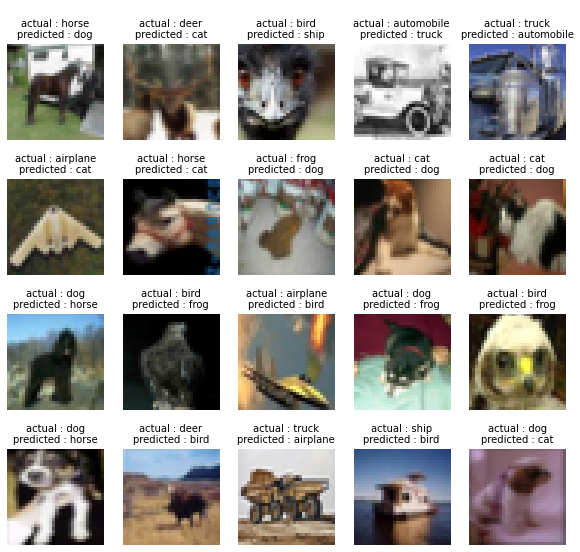

In [28]:
from utils.plot_utils import misclassified_images

images_misclassified = misclassified_images(model, test_loader, device)

### Metrics like Train and Test Loss and Accuracy

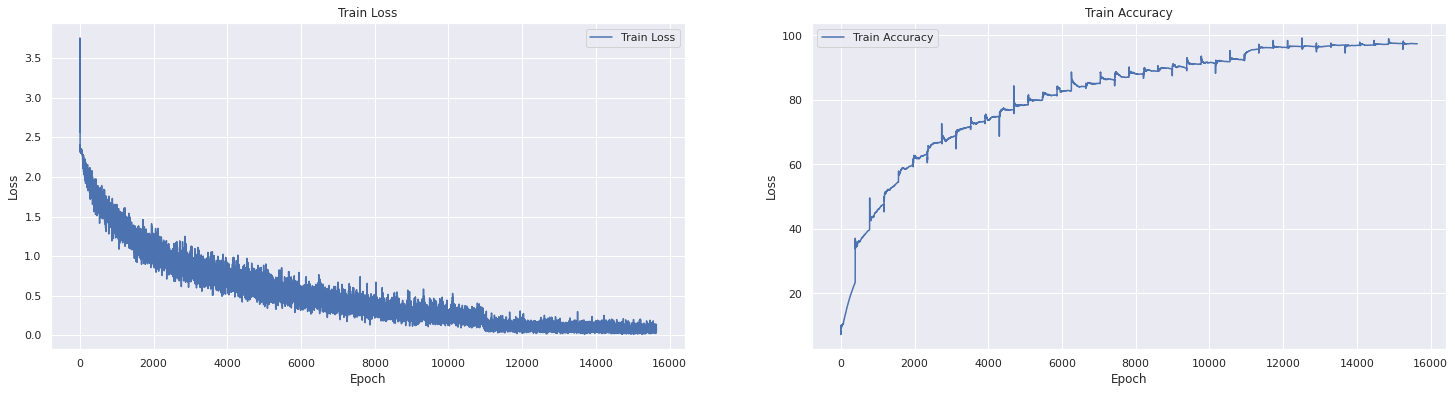

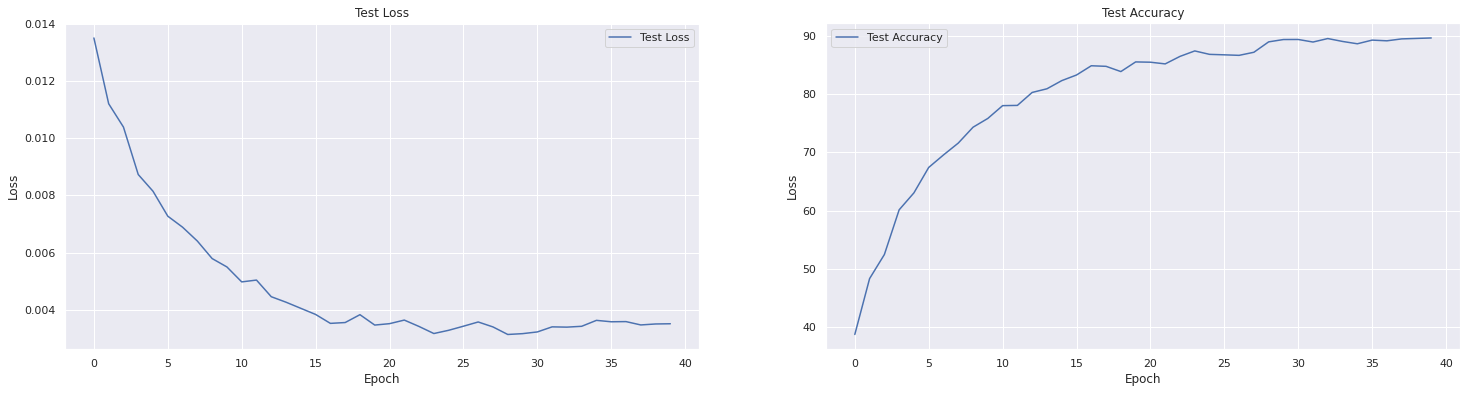

In [29]:
from utils.plot_utils import plot_metrics

plot_metrics((train_accuracy, train_losses, test_accuracy, test_losses))

### Class level accuracy

In [30]:
from utils.helper import class_level_accuracy

class_level_accuracy(model, test_loader, device, labels)

Accuracy of airplane : 91 %
Accuracy of automobile : 96 %
Accuracy of  bird : 85 %
Accuracy of   cat : 77 %
Accuracy of  deer : 89 %
Accuracy of   dog : 83 %
Accuracy of  frog : 94 %
Accuracy of horse : 91 %
Accuracy of  ship : 93 %
Accuracy of truck : 94 %


### GradCAM output for misclassified images

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


torch.Size([10, 10])
Generating Grad-CAM for layer1
Generating Grad-CAM for layer2
Generating Grad-CAM for layer3
Generating Grad-CAM for layer4


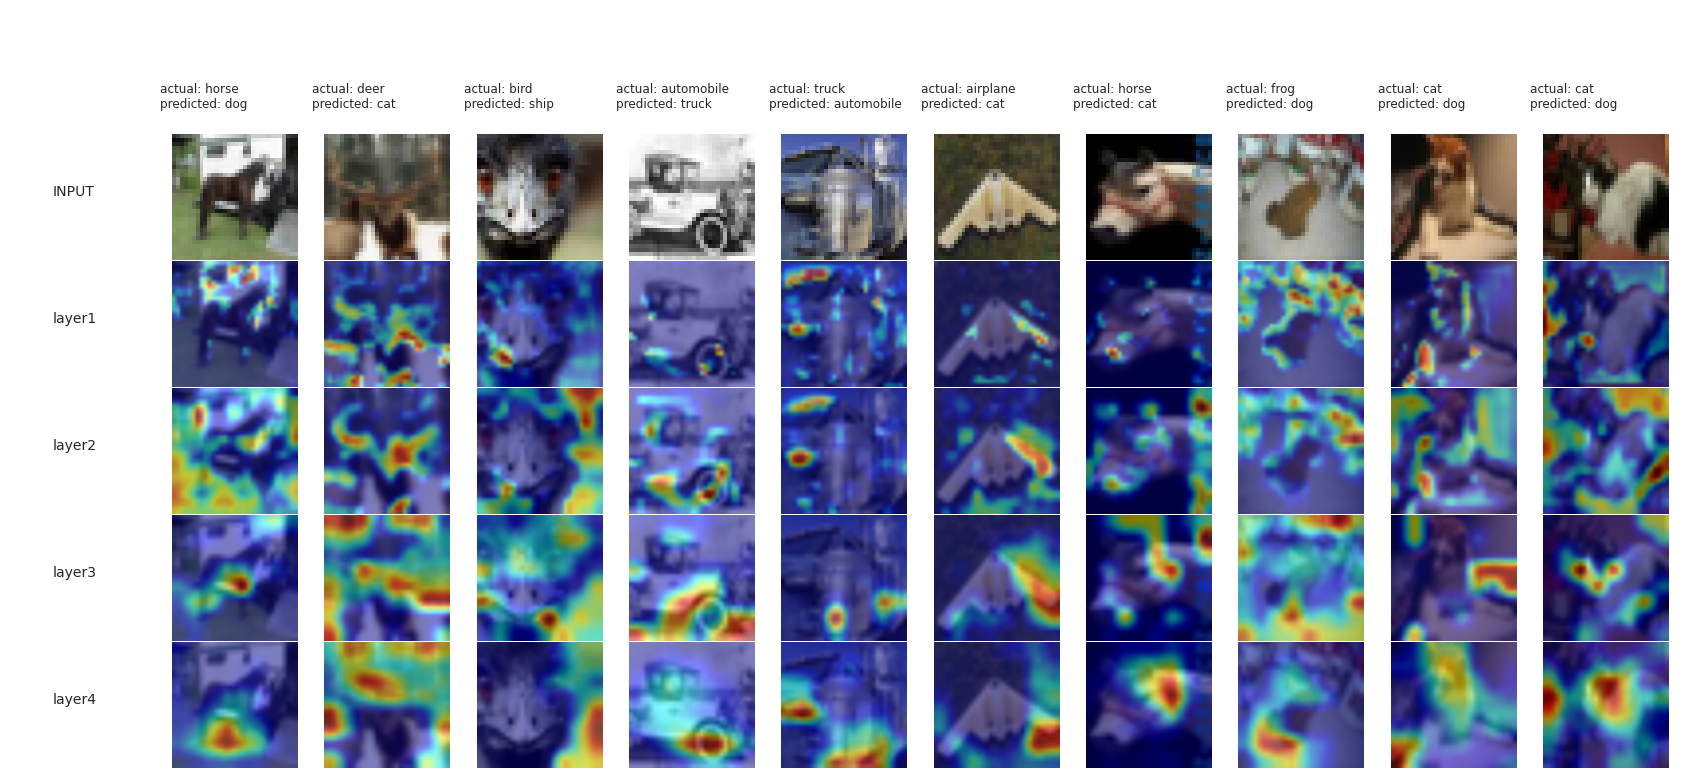

In [32]:
from utils.grad_cam import generate_gradcam, plot_gradcam

target_layers = ["layer1", "layer2", "layer3", "layer4"]
gradcam_output, probs, predicted_classes = generate_gradcam(images_misclassified[:10], model, target_layers, device)
plot_gradcam(gradcam_output, target_layers, labels, (3, 32, 32), predicted_classes, images_misclassified[:10])

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


torch.Size([10, 10])
Generating Grad-CAM for layer1
Generating Grad-CAM for layer2
Generating Grad-CAM for layer3
Generating Grad-CAM for layer4


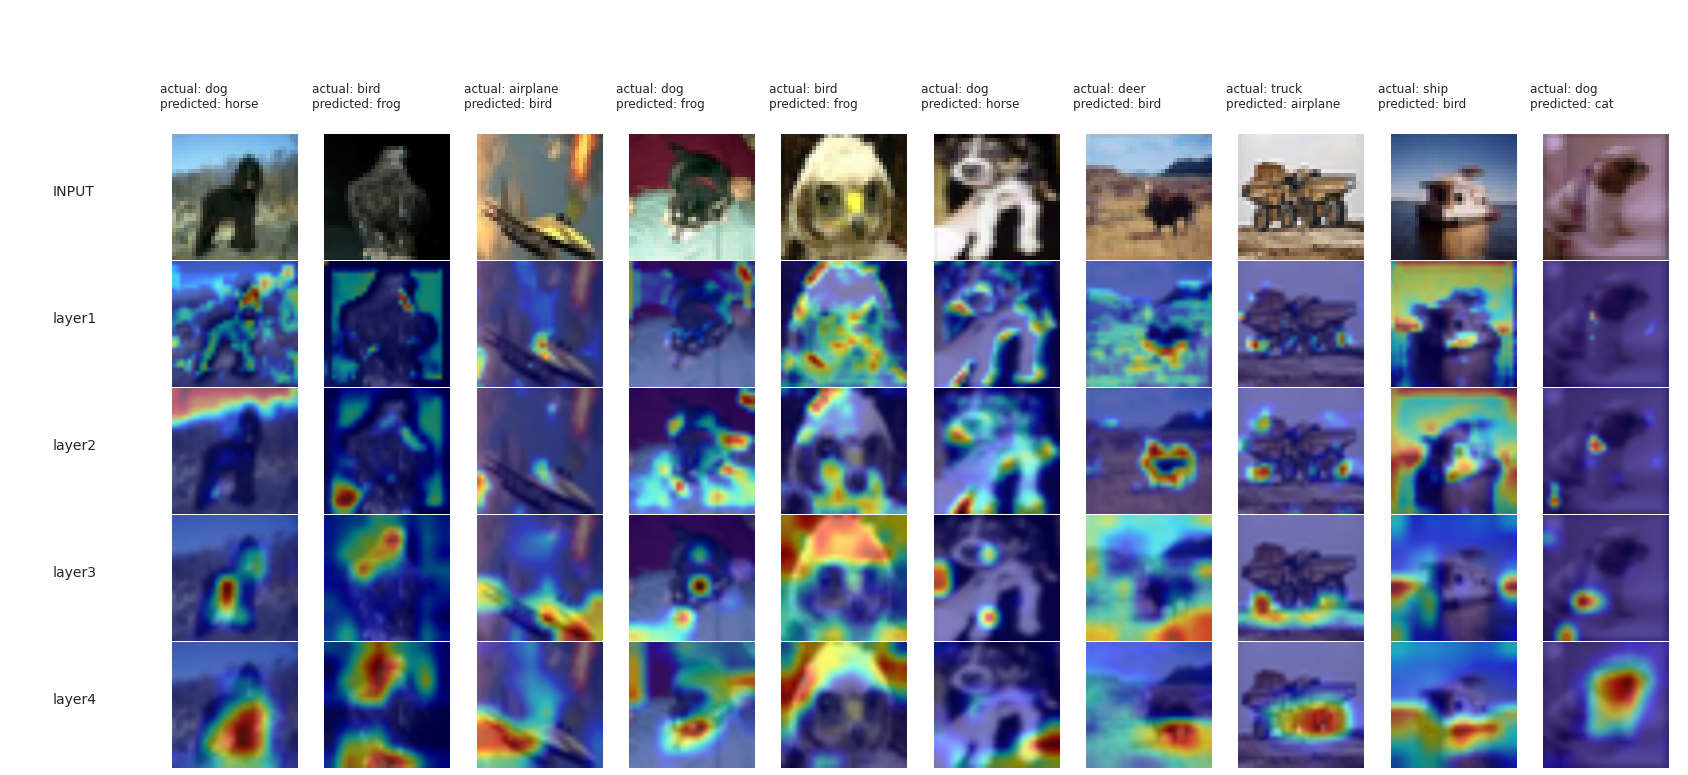

In [33]:
from utils.grad_cam import generate_gradcam, plot_gradcam

target_layers = ["layer1", "layer2", "layer3", "layer4"]
gradcam_output, probs, predicted_classes = generate_gradcam(images_misclassified[10:20], model, target_layers, device)
plot_gradcam(gradcam_output, target_layers, labels, (3, 32, 32), predicted_classes, images_misclassified[10:20])